<a href="https://colab.research.google.com/github/Litasirius/Litasirius/blob/main/memvisualisasikan_peta_risiko_bencana_alam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

HTML(value='\n    <table>\n        <tr>\n            <th>Percobaan</th>\n            <th>Bobot Banjir</th>\n  …

interactive(children=(FloatSlider(value=1.0, description='Bobot Banjir:', max=3.0), FloatSlider(value=1.0, des…

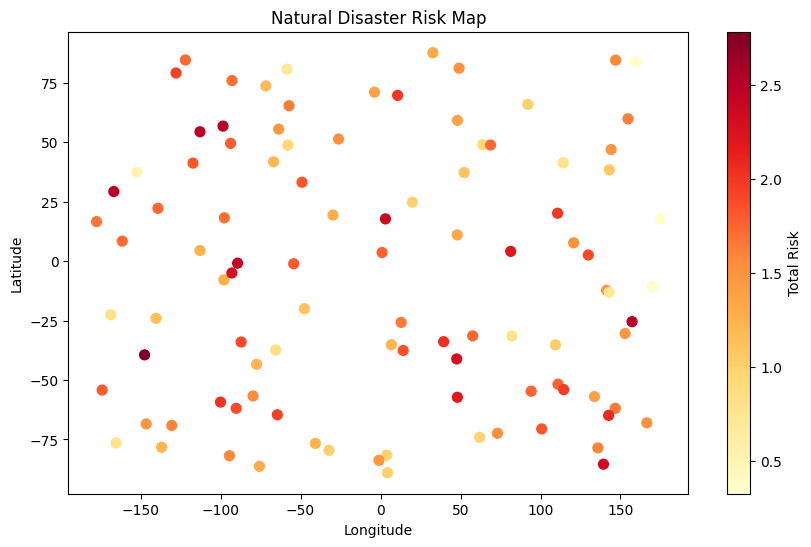

In [ ]:
import folium
import numpy as np
import pandas as pd
from ipywidgets import interactive, IntSlider, FloatSlider
import ipywidgets as widgets
from folium.plugins import HeatMap

# Data risiko bencana alam (misalnya, data dummy)
np.random.seed(42)
data = {
    'Latitude': np.random.uniform(-90, 90, 100),
    'Longitude': np.random.uniform(-180, 180, 100),
    'Flood_Risk': np.random.uniform(0, 1, 100),
    'Drought_Risk': np.random.uniform(0, 1, 100),
    'Storm_Risk': np.random.uniform(0, 1, 100)
}
df = pd.DataFrame(data)

# Fungsi untuk memvisualisasikan peta risiko bencana alam
def visualize_risk_map(flood_weight, drought_weight, storm_weight):
    m = folium.Map(location=[0, 0], zoom_start=2)

    # Kalkulasi risiko total berdasarkan bobot yang diberikan
    df['Total_Risk'] = (df['Flood_Risk'] * flood_weight +
                        df['Drought_Risk'] * drought_weight +
                        df['Storm_Risk'] * storm_weight)

    # Membuat HeatMap berdasarkan risiko total
    heat_data = [[row['Latitude'], row['Longitude'], row['Total_Risk']] for index, row in df.iterrows()]
    HeatMap(heat_data, min_opacity=0.2, radius=15, blur=10).add_to(m)
    return m

# Widget interaktif
flood_weight_slider = FloatSlider(value=1.0, min=0.0, max=3.0, step=0.1, description='Bobot Banjir:')
drought_weight_slider = FloatSlider(value=1.0, min=0.0, max=3.0, step=0.1, description='Bobot Kekeringan:')
storm_weight_slider = FloatSlider(value=1.0, min=0.0, max=3.0, step=0.1, description='Bobot Badai:')
interactive_map = interactive(visualize_risk_map, flood_weight=flood_weight_slider, drought_weight=drought_weight_slider, storm_weight=storm_weight_slider)

# Tabel percobaan interaktif
experiment_table = widgets.HTML(
    value="""
    <table>
        <tr>
            <th>Percobaan</th>
            <th>Bobot Banjir</th>
            <th>Bobot Kekeringan</th>
            <th>Bobot Badai</th>
        </tr>
        <tr>
            <td>1</td>
            <td>1.0</td>
            <td>1.0</td>
            <td>1.0</td>
        </tr>
        <tr>
            <td>2</td>
            <td></td>
            <td></td>
            <td></td>
        </tr>
        <tr>
            <td>3</td>
             <td></td>
            <td></td>
            <td></td>
        </tr>
        <tr>
            <td>4</td>
            <td></td>
            <td></td>
            <td></td>
        </tr>
        <tr>
            <td>5</td>
            <td></td>
            <td></td>
            <td></td>
        </tr>
    </table>
    """
)

# Tampilan interaktif

display(experiment_table, interactive_map)
import matplotlib.pyplot as plt

# Setelah kode yang ada, tambahkan #
plt.figure(figsize=(10, 6))
plt.scatter(df['Longitude'], df['Latitude'], c=df['Total_Risk'], cmap='YlOrRd', s=50)
plt.colorbar(label='Total Risk')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Natural Disaster Risk Map')
plt.show()